In [12]:
import sqlite3

# SQLlite connectioni 
connection = sqlite3.connect('student_grades.db')

# Step 2: Create a cursor object to interact with the database.
cursor = connection.cursor()


In [19]:
# Step 2

# SQL command to create the 'students' table
create_students_table = """
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
);
"""

# SQL command to create the 'grades' table
create_grades_table = """
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
);
"""

# Executing the SQL commands to create the tables
cursor.execute(create_students_table)
cursor.execute(create_grades_table)

# Committing the changes
connection.commit()

# Confirming table creation by fetching table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables


[('students',), ('sqlite_sequence',), ('grades',)]

In [21]:

# Step 2: Insert sample data into the 'students' table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

insert_students_query = "INSERT INTO students (first_name, last_name) VALUES (?, ?)"
cursor.executemany(insert_students_query, students_data)

# Step 3: Insert sample data into the 'grades' table with 4 grades for each student
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (1, 'Science', 92),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (2, 'Science', 80),
    (3, 'Math', 91),
    (3, 'English', 85),
    (3, 'History', 89),
    (3, 'Science', 87),
    (4, 'Math', 78),
    (4, 'English', 80),
    (4, 'History', 82),
    (4, 'Science', 79),
    (5, 'Math', 88),
    (5, 'English', 92),
    (5, 'History', 87),
    (5, 'Science', 90)
]

insert_grades_query = "INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)"
cursor.executemany(insert_grades_query, grades_data)

# Step 4: Commit the changes to save them in the database
connection.commit()

# Step 5: Fetch data to confirm insertion
cursor.execute("SELECT * FROM students")
students_result = cursor.fetchall()

cursor.execute("SELECT * FROM grades")
grades_result = cursor.fetchall()

(students_result, grades_result)


([(1, 'Alice', 'Johnson'),
  (2, 'Bob', 'Smith'),
  (3, 'Carol', 'White'),
  (4, 'David', 'Brown'),
  (5, 'Eve', 'Davis')],
 [(1, 1, 'Math', 95),
  (2, 1, 'English', 88),
  (3, 1, 'History', 90),
  (4, 1, 'Science', 92),
  (5, 2, 'Math', 82),
  (6, 2, 'English', 76),
  (7, 2, 'History', 85),
  (8, 2, 'Science', 80),
  (9, 3, 'Math', 91),
  (10, 3, 'English', 85),
  (11, 3, 'History', 89),
  (12, 3, 'Science', 87),
  (13, 4, 'Math', 78),
  (14, 4, 'English', 80),
  (15, 4, 'History', 82),
  (16, 4, 'Science', 79),
  (17, 5, 'Math', 88),
  (18, 5, 'English', 92),
  (19, 5, 'History', 87),
  (20, 5, 'Science', 90)])

Combined Students and Grades Data
   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3       Alice   Johnson  Science     92
4         Bob     Smith     Math     82
5         Bob     Smith  English     76
6         Bob     Smith  History     85
7         Bob     Smith  Science     80
8       Carol     White     Math     91
9       Carol     White  English     85
10      Carol     White  History     89
11      Carol     White  Science     87
12      David     Brown     Math     78
13      David     Brown  English     80
14      David     Brown  History     82
15      David     Brown  Science     79
16        Eve     Davis     Math     88
17        Eve     Davis  English     92
18        Eve     Davis  History     87
19        Eve     Davis  Science     90


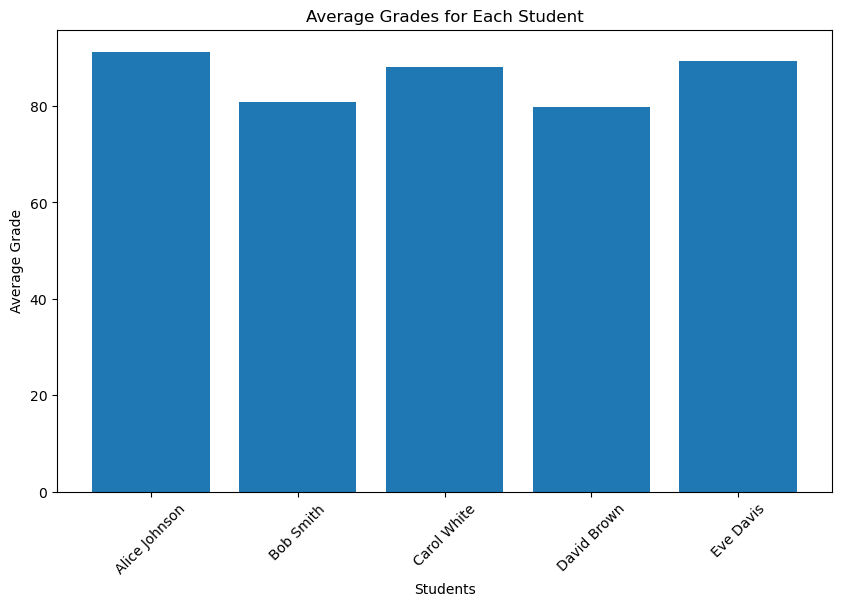

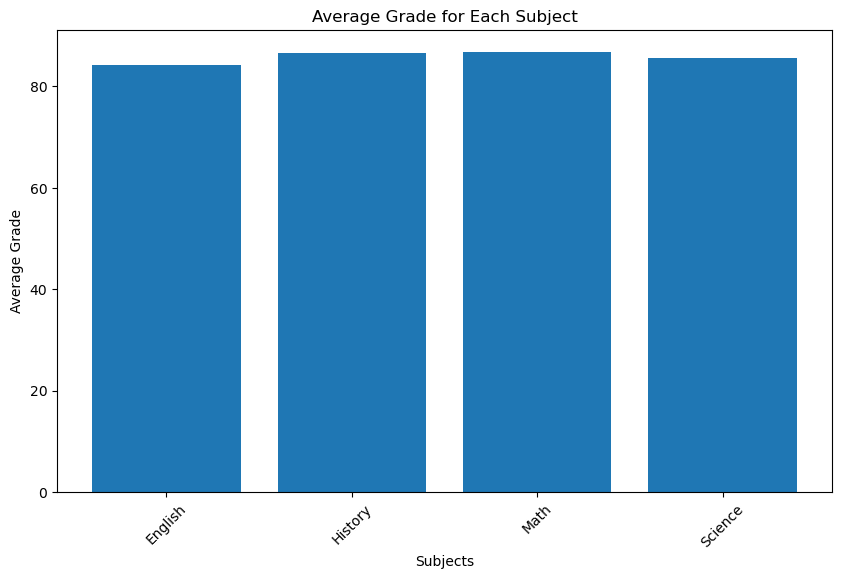

{"All students' names and grades": [('Alice', 'Johnson', 'Math', 95),
  ('Alice', 'Johnson', 'English', 88),
  ('Alice', 'Johnson', 'History', 90),
  ('Alice', 'Johnson', 'Science', 92),
  ('Bob', 'Smith', 'Math', 82),
  ('Bob', 'Smith', 'English', 76),
  ('Bob', 'Smith', 'History', 85),
  ('Bob', 'Smith', 'Science', 80),
  ('Carol', 'White', 'Math', 91),
  ('Carol', 'White', 'English', 85),
  ('Carol', 'White', 'History', 89),
  ('Carol', 'White', 'Science', 87),
  ('David', 'Brown', 'Math', 78),
  ('David', 'Brown', 'English', 80),
  ('David', 'Brown', 'History', 82),
  ('David', 'Brown', 'Science', 79),
  ('Eve', 'Davis', 'Math', 88),
  ('Eve', 'Davis', 'English', 92),
  ('Eve', 'Davis', 'History', 87),
  ('Eve', 'Davis', 'Science', 90)],
 'Average grade for each student': [('Alice', 'Johnson', 91.25),
  ('Bob', 'Smith', 80.75),
  ('Carol', 'White', 88.0),
  ('David', 'Brown', 79.75),
  ('Eve', 'Davis', 89.25)],
 'Student with the highest average grade': ('Alice', 'Johnson', 91.25),

In [25]:
# Step 4: Perform SQL Queries

# 1. Retrieve all students' names and their grades
query_1 = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id;
"""
cursor.execute(query_1)
students_grades = cursor.fetchall()

# 2. Find the average grade for each student
query_2 = """
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
"""
cursor.execute(query_2)
average_grade_per_student = cursor.fetchall()

# 3. Find the student with the highest average grade
query_3 = """
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1;
"""
cursor.execute(query_3)
highest_avg_student = cursor.fetchone()

# 4. Find the average grade for the Math subject
query_4 = """
SELECT AVG(grade) as average_math_grade
FROM grades
WHERE subject = 'Math';
"""
cursor.execute(query_4)
average_math_grade = cursor.fetchone()

# 5. List all students who scored above 90 in any subject
query_5 = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90;
"""
cursor.execute(query_5)
students_above_90 = cursor.fetchall()

# Step 5: Load Data into Pandas
# 1. Load the data from the students and grades tables into DataFrames
students_df = pd.read_sql_query("SELECT * FROM students", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)

# 2. Use JOIN queries to combine the data from both tables into a single DataFrame
combined_query = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id;
"""
combined_df = pd.read_sql_query(combined_query, connection)

# Display the combined DataFrame
print("Combined Students and Grades Data")
print(combined_df)

# 3. Visualize the data with Matplotlib

# Plot the average grades for each student
average_grades_df = pd.DataFrame(average_grade_per_student, columns=['first_name', 'last_name', 'average_grade'])
average_grades_df['full_name'] = average_grades_df['first_name'] + ' ' + average_grades_df['last_name']

plt.figure(figsize=(10, 6))
plt.bar(average_grades_df['full_name'], average_grades_df['average_grade'])
plt.xlabel('Students')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart showing the average grade for each subject
average_subject_grades_df = combined_df.groupby('subject')['grade'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(average_subject_grades_df['subject'], average_subject_grades_df['grade'])
plt.xlabel('Subjects')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.xticks(rotation=45)
plt.show()

# Display SQL query results in the console
{
    "All students' names and grades": students_grades,
    "Average grade for each student": average_grade_per_student,
    "Student with the highest average grade": highest_avg_student,
    "Average grade for Math subject": average_math_grade,
    "Students who scored above 90": students_above_90
}

